In [2]:
import os 
import pandas as pd
import random
import shutil
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Verifying Data Structure

In [11]:

base_path= "D:/Blood_Cancer_Classification/data/C-NMC_Leukemia/"

for fold in ['fold_0','fold_1','fold_2']:
  all_count = len(os.listdir(f"{base_path}/training_data/{fold}/all"))
  hem_count = len(os.listdir(f"{base_path}/training_data/{fold}/hem"))
  print(f"all count: {all_count} ; hem_count: {hem_count}")

val_images = len(os.listdir(f"{base_path}/validation_data/C-NMC_test_prelim_phase_data/")) 
print(f"Prelims images count: {val_images}")

test_images = len(os.listdir(f"{base_path}/testing_data/C-NMC_test_final_phase_data/"))
print(f"Final phase images : {test_images}")

all count: 2397 ; hem_count: 1130
all count: 2418 ; hem_count: 1163
all count: 2457 ; hem_count: 1096
Prelims images count: 1867
Final phase images : 2586


## PREPROCESSING

Validation Data Processing

In [12]:
labels_df = pd.read_csv(f"{base_path}validation_data/C-NMC_test_prelim_phase_data_labels.csv")
print(f"Labels shape: {labels_df.shape}")
print(labels_df['labels'].value_counts())  

test_base = 'D:/Blood_Cancer_Classification/data/processed/test/'
for _, row in labels_df.iterrows():
    img_name = row['new_names']
    label = row['labels']
    src = f"{base_path}validation_data/C-NMC_test_prelim_phase_data/{img_name}"
    dst = f"{test_base}all/{img_name}" if label == 1 else f"{test_base}hem/{img_name}"
    if os.path.exists(src):
        shutil.copy(src, dst)

Labels shape: (1867, 3)
labels
1    1219
0     648
Name: count, dtype: int64


Training Data Merge and Split

In [17]:
base_path = "D:/Blood_Cancer_Classification/data/C-NMC_Leukemia/training_data/"
train_paths=[]
train_labels=[]

for fold in ['fold_0','fold_1','fold_2']:
    fold_all = f"{base_path}/{fold}/all/"
    fold_hem = f"{base_path}/{fold}/hem/"

    for img_name in os.listdir(fold_all):
        train_paths.append(f"{fold_all}/{img_name}")
        train_labels.append(1)

    for img_name in os.listdir(fold_hem):
        train_paths.append(f"{fold_hem}/{img_name}")
        train_labels.append(0)
    
print("Total Training images: ",len(train_paths))

#Splitting data into 90% train and 10%val

train_paths,val_paths,train_lbls,val_lbls = train_test_split(train_paths,train_labels,test_size=0.1,random_state=30,stratify=train_labels)

print(f"Train size: {len(train_paths)} ; Val size: {len(val_paths)}")

Total Training images:  10661
Train size: 9594 ; Val size: 1067


In [18]:
train_base = "D:/Blood_Cancer_Classification/data/processed/train/"
val_base = "D:/Blood_Cancer_Classification/data/processed/val/"

#Copying train images
for path,label in zip(train_paths,train_lbls):
    dst_folder = 'all/' if label == 1 else 'hem/'
    dst_path = f"{train_base}{dst_folder}{os.path.basename(path)}"  
    shutil.copy(path, dst_path)

#Copying val images
for path,label in zip(val_paths,val_lbls):
    dst_folder = "all/" if label == 1 else "hem/"
    dst_path = f"{val_base}{dst_folder}{os.path.basename(path)}"
    shutil.copy(path,dst_path)


In [19]:
for split in ['train','val','test']:
    all_count = len([f for f in os.listdir(f"D:/Blood_Cancer_Classification/data/processed/{split}/all/") if f.endswith(('.bmp','.jpg'))])
    hem_count = len([f for f in os.listdir(f"D:/Blood_Cancer_Classification/data/processed/{split}/hem/") if f.endswith(('.bmp','.jpg'))])
    print(f"{split}: ALL={all_count} ,HEM= {hem_count} , Total={all_count+hem_count}")

train: ALL=6544 ,HEM= 3050 , Total=9594
val: ALL=728 ,HEM= 339 , Total=1067
test: ALL=1219 ,HEM= 648 , Total=1867


## Exploratory Data Analysis

CLASS DISTRIBUTION

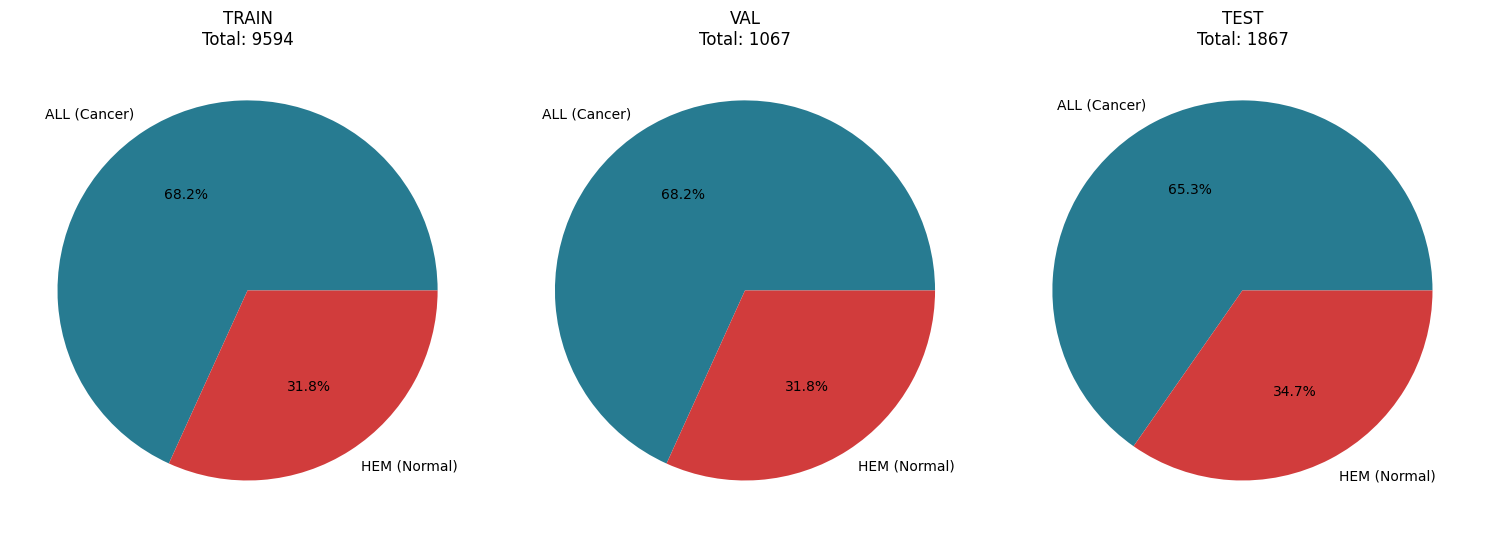

In [7]:
splits = ['train','val','test']
fig,axes = plt.subplots(1,3,figsize=(15,6))
for i,split in enumerate(splits):
    all_count = len(os.listdir(f"D:/Blood_Cancer_Classification/data/processed/{split}/all/"))
    hem_count = len(os.listdir(f"D:/Blood_Cancer_Classification/data/processed/{split}/hem/"))

    axes[i].pie([all_count,hem_count],labels =["ALL (Cancer)","HEM (Normal)"],colors=["#277B91","#D13C3C"], autopct='%1.1f%%')
    axes[i].set_title(f"{split.upper()}\nTotal: {all_count+ hem_count}")

plt.tight_layout()
plt.savefig('D:/Blood_Cancer_Classification/reports/ClassDistribution.png',dpi=300,bbox_inches='tight')
plt.show()


SAMPLE IMAGES

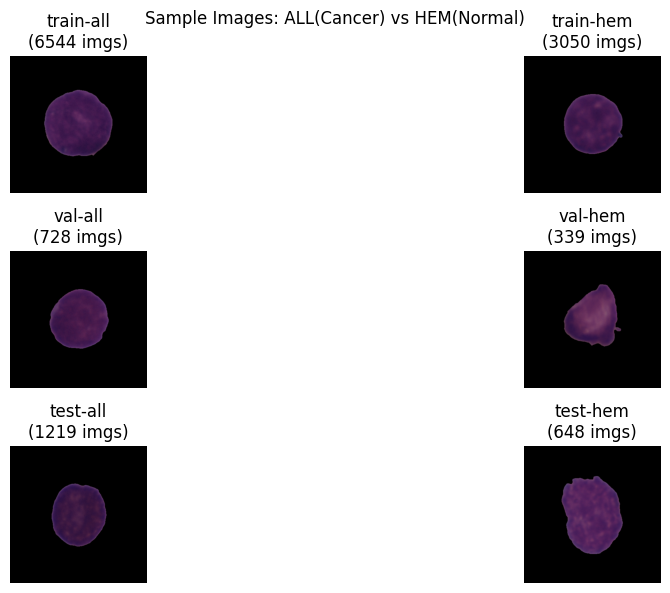

In [26]:
fig,axes = plt.subplots(3,2,figsize=(14,6))

for row, split in enumerate(['train', 'val', 'test']):
    for col, cls in enumerate(['all', 'hem']):
        folder = f"D:/Blood_Cancer_Classification/data/processed/{split}/{cls}/"

        if os.path.exists(folder) and len(os.listdir(folder)) > 0:
            img_files = [f for f in os.listdir(folder) if f.lower().endswith(('.bmp','.jpg','.png'))]
        
            if img_files:
                img_file = np.random.choice(img_files)
                img = Image.open(f"{folder}/{img_file}")
                axes[row, col].imshow(img)
                axes[row, col].set_title(f"{split}-{cls}\n({len(img_files)} imgs)")
        
            else:
                axes[row, col].text(0.5, 0.5, 'EMPTY', ha='center', va='center')
        
        else:
            axes[row, col].text(0.5, 0.5, f"{cls}\nMISSING", ha='center', va='center', transform=axes[row, col].transAxes)
        
        axes[row, col].axis('off')  

plt.tight_layout()
plt.suptitle('Sample Images: ALL(Cancer) vs HEM(Normal)',fontsize=12)
plt.savefig('D:/Blood_Cancer_Classification/reports/sample_images.png', dpi=300, bbox_inches='tight')
plt.show()

Images size check

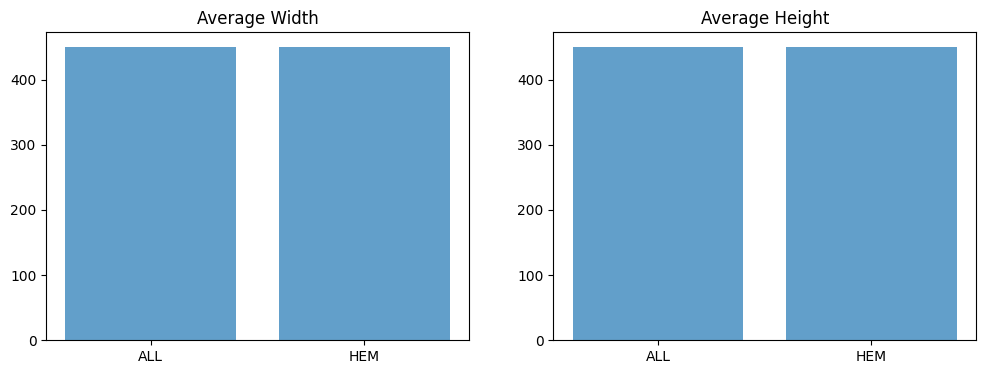

Avg sizes: 450.0 x 450.0


In [27]:
def get_img_stats(folder):
    sizes = []
    for img_file in os.listdir(folder)[:100]: 
        img = Image.open(f"{folder}/{img_file}")
        sizes.append(img.size)
    return np.array(sizes).mean(axis=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


widths, heights = [], []
for split in ['train', 'val', 'test']:
    for cls in ['all', 'hem']:
        w, h = get_img_stats(f"D:/Blood_Cancer_Classification/data/processed/{split}/{cls}/")
        widths.append(w); heights.append(h)

axes[0].bar(['ALL', 'HEM'], [widths[0], widths[1]], alpha=0.7)
axes[0].set_title('Average Width')
axes[1].bar(['ALL', 'HEM'], [heights[0], heights[1]], alpha=0.7)
axes[1].set_title('Average Height')

plt.savefig('D:/Blood_Cancer_Classification/reports/img_dimensions.png', dpi=300)
plt.show()
print("Avg sizes:", np.mean(widths), "x", np.mean(heights))


RGB Channel Analysis (Stain Check)

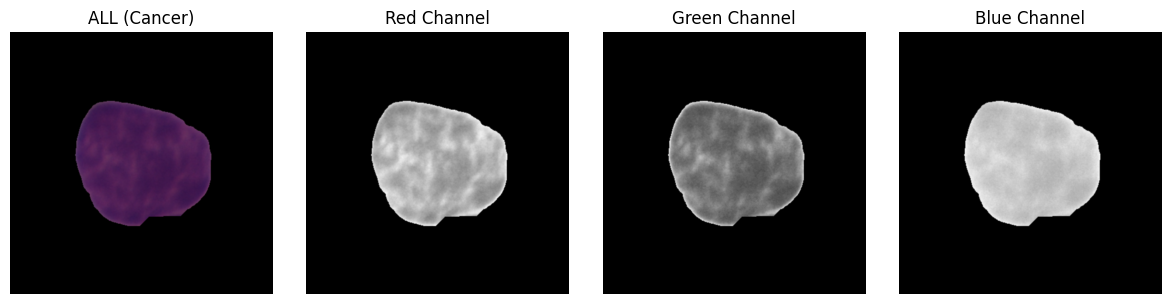

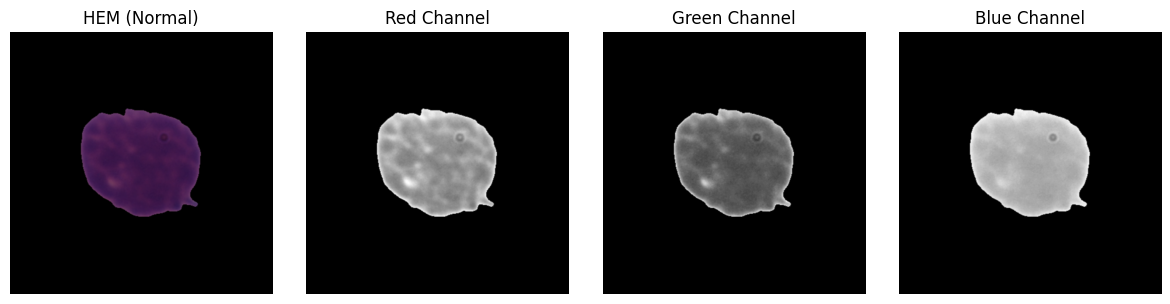

In [3]:
def plot_channels(folder, title):
    img = Image.open(f"{folder}/{np.random.choice(os.listdir(folder))}")
    img_array = np.array(img)
    
    fig, axes = plt.subplots(1, 4, figsize=(12, 3))
    axes[0].imshow(img_array)
    axes[0].set_title(title)
    axes[0].axis('off')

    
    for i, ch in enumerate(['Red', 'Green', 'Blue']):
        axes[i+1].imshow(img_array[:,:,i], cmap='gray')
        axes[i+1].set_title(f'{ch} Channel')
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()

plot_channels('D:/Blood_Cancer_Classification/data/processed/train/all/', 'ALL (Cancer)')
plot_channels('D:/Blood_Cancer_Classification/data/processed/train/hem/', 'HEM (Normal)')

In [36]:
summary = []
for split in ['train', 'val', 'test']:
    all_c = len(os.listdir(f"D:/Blood_Cancer_Classification/data/processed/{split}/all/"))
    hem_c = len(os.listdir(f"D:/Blood_Cancer_Classification/data/processed/{split}/hem/"))
    summary.append([split, all_c, hem_c, all_c+hem_c, round(all_c/(all_c+hem_c)*100,1)])

df_summary = pd.DataFrame(summary, columns=['Split', 'ALL', 'HEM', 'Total', 'ALL%'])
print(df_summary.to_markdown())

|    | Split   |   ALL |   HEM |   Total |   ALL% |
|---:|:--------|------:|------:|--------:|-------:|
|  0 | train   |  6544 |  3050 |    9594 |   68.2 |
|  1 | val     |   728 |   339 |    1067 |   68.2 |
|  2 | test    |  1219 |   648 |    1867 |   65.3 |
